In [1]:
import time, gzip, json, requests, facebook, logging
from time import sleep, strftime
from datetime import datetime
from facebookads.exceptions import FacebookError
from requests.exceptions import HTTPError
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
def count_posts_by_month(month, profile):
    
    total_post = 0
    open_path = '/home/rafael/TCC_II/coleta_TCC_II/coletas/' + profile + '/' + month + '/posts/posts_total.json'
    
    file = open(open_path, 'r')
    
    for line in file:
        total_post += 1
            
    file.close()           
        
    return total_post         
            
    

In [8]:
def count_posts_by_period(months, profile):
    
    total_posts_pre_election = 0
    total_posts_in_election = 0
    total_posts_pos_election = 0
    
    
    for id_months in months:        
    
        file = open('/home/rafael/TCC_II/coleta_TCC_II/coletas/' + profile + '/' + id_months + '/posts/posts_total.json', 'r')
        
        if id_months == 'agosto' or  id_months == 'setembro':
            for line in file:
                total_posts_pre_election += 1
        elif id_months == 'novembro' or id_months == 'dezembro':
            for line in file:
                total_posts_pos_election += 1
        else:
            for line in file:
                
                data_created_time = json.loads(line)['created_time']
                
                if data_created_time < '2018-10-07T00:00:01+0000':
                    total_posts_pre_election += 1
                elif data_created_time > '2018-10-28T23:59:58+0000':
                    total_posts_pos_election += 1
                else:
                    total_posts_in_election += 1

        file.close()
    
    return (total_posts_pre_election, total_posts_in_election, total_posts_pos_election)  

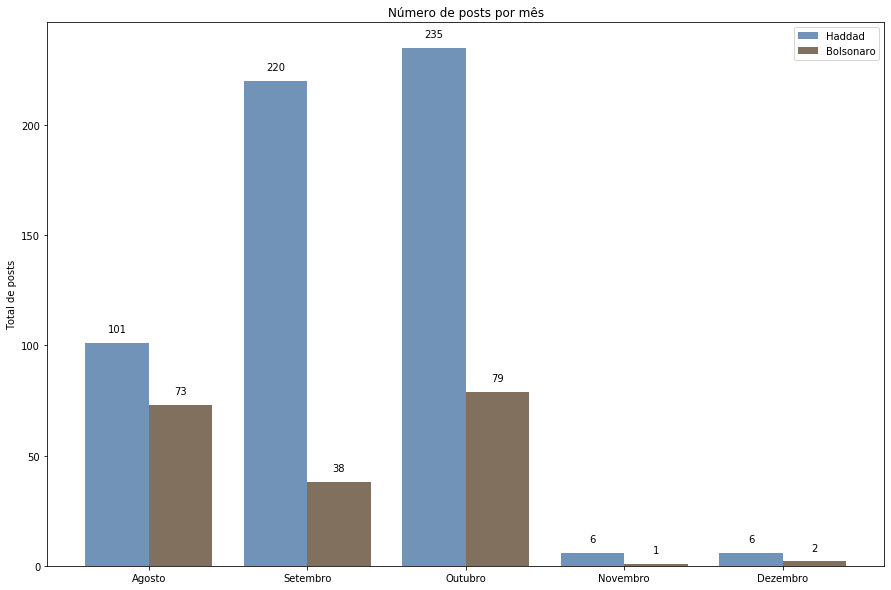

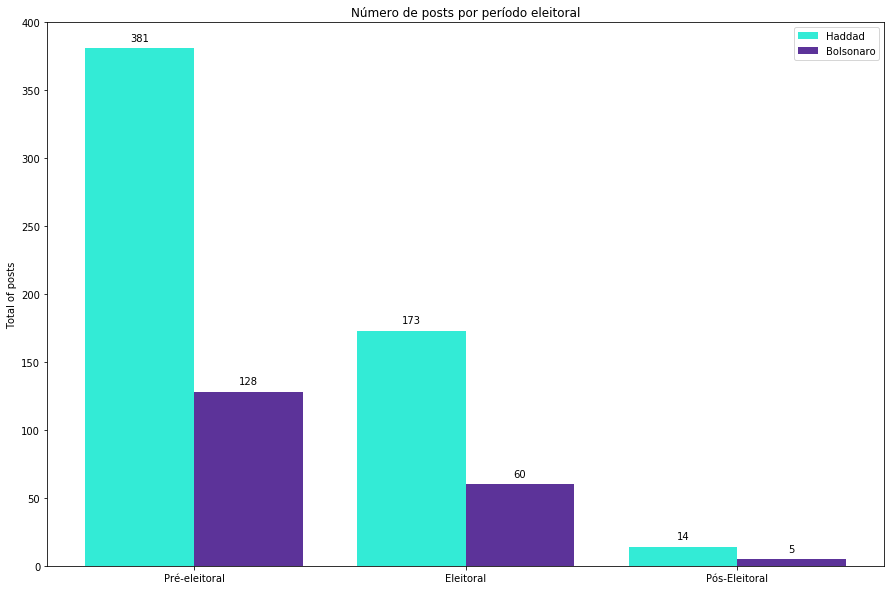

In [10]:
def main():
    
    months = ['agosto', 'setembro', 'outubro', 'novembro', 'dezembro']
    profile_id = ['haddad', 'bolsonaro']
    
    posts_months_haddad = []
    posts_period_haddad = []
    
    posts_months_bolsonaro = []
    posts_period_bolsonaro = []
    
#-----------------------------------graph posts by months--------------------------------------------
    
    for id_months in months:
        
        posts_total_haddad = count_posts_by_month(id_months, profile_id[0])
        posts_total_bolsonaro = count_posts_by_month(id_months, profile_id[1])
        
#         array com a quantidade de post por mes
        
        posts_months_haddad.append(posts_total_haddad)
        posts_months_bolsonaro.append(posts_total_bolsonaro)
        
#---------------------------graph posts by month--------------------------------------------------        
    
    plt.rcParams["figure.figsize"] = [15,10]
    fig, ax = plt.subplots()
    X = np.arange(5)
    bar_width = 0.40
    
        
    title_graph1 = 'Número de posts por mês'
    axisY = 'Total de posts'    
    plt.title(title_graph1)
    plt.ylabel(axisY)
    graph1 = plt.bar(X, posts_months_haddad, bar_width, color=(0.2, 0.4, 0.6, 0.7), label = 'Haddad')  
    graph2 = plt.bar(X + bar_width, posts_months_bolsonaro, bar_width, color=(0.3, 0.2, 0.1, 0.7), label = 'Bolsonaro')
    plt.xticks(X + 0.2, ('Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'))
    plt.legend()
        
    rects1 = graph1.patches
    rects2 = graph2.patches
    
    for rect, label in zip(rects1, posts_months_haddad):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height + 4, label, ha='center', va='bottom')
        
    for rect, label in zip(rects2, posts_months_bolsonaro):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height + 4, label, ha='center', va='bottom')        

    plt.savefig('posts_mes.png', dpi = 300)   
    

#---------------------------graph posts by period---------------------------------------------------

    
    posts_pre_total_haddad, posts_in_total_haddad, posts_pos_total_haddad = count_posts_by_period(months, profile_id[0])
    posts_pre_total_bolsonaro, posts_in_total_bolsonaro, posts_pos_total_bolsonaro = count_posts_by_period(months, profile_id[1])
    
    posts_period_haddad.append(posts_pre_total_haddad)
    posts_period_haddad.append(posts_in_total_haddad)
    posts_period_haddad.append(posts_pos_total_haddad)
    
    posts_period_bolsonaro.append(posts_pre_total_bolsonaro)
    posts_period_bolsonaro.append(posts_in_total_bolsonaro)
    posts_period_bolsonaro.append(posts_pos_total_bolsonaro)

    Y = np.arange(3)
    bar_width = 0.40
    
    fig2 = plt.figure(2)
    title_graph2 = 'Número de posts por período eleitoral'
    axisY = 'Total of posts'
    plt.title(title_graph2)
    plt.ylabel(axisY)
    graph3 = plt.bar(Y, posts_period_haddad, bar_width, color=(0.0, 0.9, 0.8, 0.8), label = 'Haddad')
    graph4 = plt.bar(Y + bar_width, posts_period_bolsonaro, bar_width, color=(0.2, 0.0, 0.5, 0.8), label = 'Bolsonaro')
    plt.xticks(Y + 0.2, ('Pré-eleitoral', 'Eleitoral', 'Pós-Eleitoral'))
    plt.legend()
    
    rects3 = graph3.patches
    rects4 = graph4.patches
    
#     colocar o valor em cima das barras
    
    for rect, label in zip(rects3, posts_period_haddad):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height + 4, label, ha='center', va='bottom')
        
    for rect, label in zip(rects4, posts_period_bolsonaro):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height + 4, label, ha='center', va='bottom')

    plt.savefig('posts_period.png', dpi = 300) 
    
    plt.show()
       
if __name__ == "__main__":
    main()
    
    